# 设计分类器

上一步基于客户的购买行为进行了 K-Means 客户聚类分析，在这一部分将进一步使用机器学习分类器对客户类别进行预测。


##目标
*   训练分类器，以便未来可以预测新客户所属的客户类别
*   评估不同机器学习模型的性能，以选择最佳模型


###数据处理
*   数据来源: clustered_customers.csv，包含 客户的消费行为、订单次数、消费频率、购买的不同产品类别占比等信息。






In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

# 读取数据
file_path = "/content/clustered_customers.csv"
customer_features = pd.read_csv(file_path)

# **检查特征是否和 CustomerCluster 直接相关**
correlation_matrix = customer_features.corr()
print("\n**相关性矩阵（与 CustomerCluster 相关的特征）**")
print(correlation_matrix["CustomerCluster"].sort_values(ascending=False))





**相关性矩阵（与 CustomerCluster 相关的特征）**
CustomerCluster          1.000000
UniqueProductsBought     0.387591
TotalOrders              0.342378
TotalSpent               0.246776
PurchaseFrequency        0.171448
AvgOrderValue            0.076652
Category_2               0.068655
MaxOrderValue            0.030987
Category_4               0.029225
Category_0               0.002822
Category_3               0.000991
MinOrderValue           -0.014412
Category_1              -0.018181
Category_5              -0.047674
CustomerID              -0.072844
DaysSinceLastPurchase   -0.343077
Name: CustomerCluster, dtype: float64



*   数据清洗: 去除了 CustomerID 等无关字段，并对数据进行了标准化处理，以确保所有特征都处于相同的尺度。
*   目标变量: CustomerCluster，即客户所属的类别（Cluster 0 - Cluster 6）。


##机器学习模型选择
*   为了找到最佳的分类器，我们首先对 多个分类模型 进行了 测试集准确率 和 交叉验证准确率 的评估。
尝试的模型包括：
*   逻辑回归（Logistic Regression）
*   K 近邻（KNN）
*   决策树（Decision Tree）
*   随机森林（Random Forest）
*   梯度提升（Gradient Boosting）
*   投票分类器（Voting Classifier）




Logistic Regression 测试集准确率: 0.6663
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       458
           1       0.41      0.37      0.39       104
           2       0.44      0.18      0.25        39
           3       0.37      0.33      0.35        21
           4       0.48      0.50      0.49       178
           5       0.47      0.37      0.41        68
           6       1.00      0.14      0.25         7

    accuracy                           0.67       875
   macro avg       0.57      0.40      0.43       875
weighted avg       0.65      0.67      0.65       875



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28102 (\N{CJK UNIFIED IDEOGRAPH-6DC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


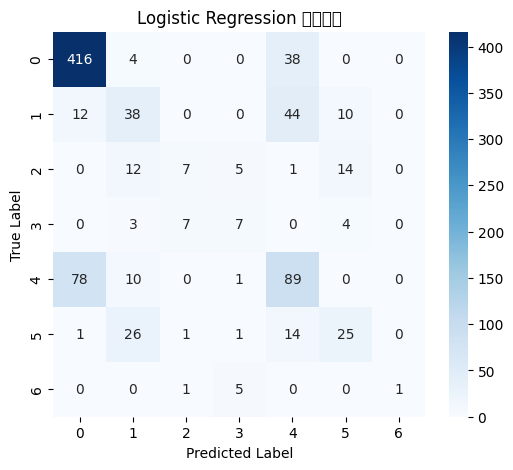


KNN 测试集准确率: 0.7211
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       458
           1       0.46      0.53      0.49       104
           2       0.43      0.38      0.41        39
           3       0.44      0.33      0.38        21
           4       0.60      0.59      0.59       178
           5       0.47      0.34      0.39        68
           6       1.00      0.43      0.60         7

    accuracy                           0.72       875
   macro avg       0.61      0.50      0.54       875
weighted avg       0.71      0.72      0.72       875



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28102 (\N{CJK UNIFIED IDEOGRAPH-6DC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


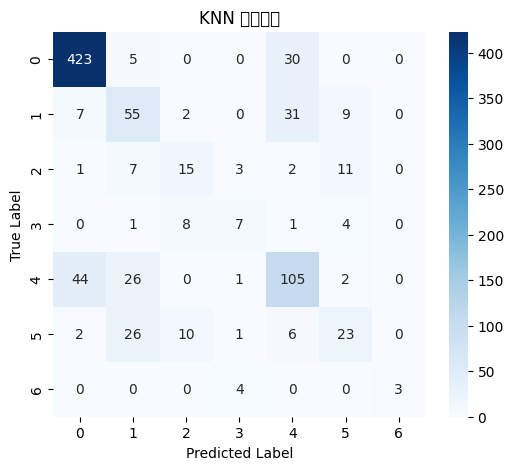


Decision Tree 测试集准确率: 0.7829
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       458
           1       0.56      0.58      0.57       104
           2       0.47      0.46      0.47        39
           3       0.69      0.52      0.59        21
           4       0.73      0.71      0.72       178
           5       0.46      0.47      0.47        68
           6       0.83      0.71      0.77         7

    accuracy                           0.78       875
   macro avg       0.67      0.63      0.65       875
weighted avg       0.78      0.78      0.78       875



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28102 (\N{CJK UNIFIED IDEOGRAPH-6DC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


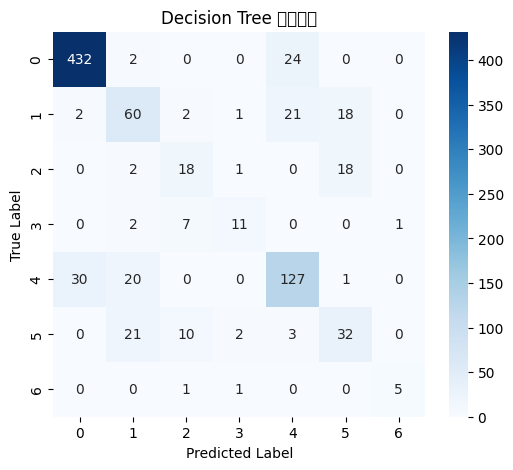


Random Forest 测试集准确率: 0.8194
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       458
           1       0.64      0.59      0.61       104
           2       0.61      0.44      0.51        39
           3       0.60      0.43      0.50        21
           4       0.72      0.82      0.76       178
           5       0.61      0.57      0.59        68
           6       0.88      1.00      0.93         7

    accuracy                           0.82       875
   macro avg       0.71      0.69      0.69       875
weighted avg       0.82      0.82      0.82       875



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28102 (\N{CJK UNIFIED IDEOGRAPH-6DC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


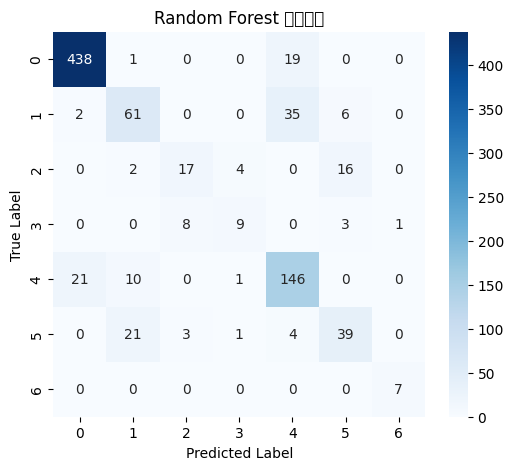


AdaBoost 测试集准确率: 0.6537
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       458
           1       0.43      0.44      0.44       104
           2       0.42      0.38      0.40        39
           3       0.30      0.14      0.19        21
           4       0.45      0.41      0.43       178
           5       0.44      0.29      0.35        68
           6       0.00      0.00      0.00         7

    accuracy                           0.65       875
   macro avg       0.41      0.37      0.38       875
weighted avg       0.63      0.65      0.64       875



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/c

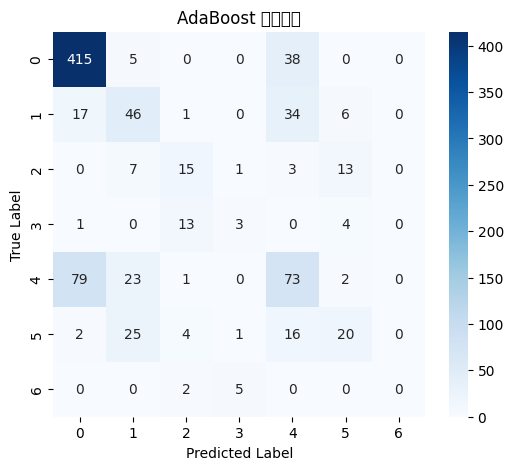


Gradient Boosting 测试集准确率: 0.8400
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       458
           1       0.66      0.63      0.65       104
           2       0.53      0.41      0.46        39
           3       0.79      0.52      0.63        21
           4       0.78      0.85      0.81       178
           5       0.60      0.60      0.60        68
           6       0.86      0.86      0.86         7

    accuracy                           0.84       875
   macro avg       0.74      0.69      0.71       875
weighted avg       0.84      0.84      0.84       875



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28102 (\N{CJK UNIFIED IDEOGRAPH-6DC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


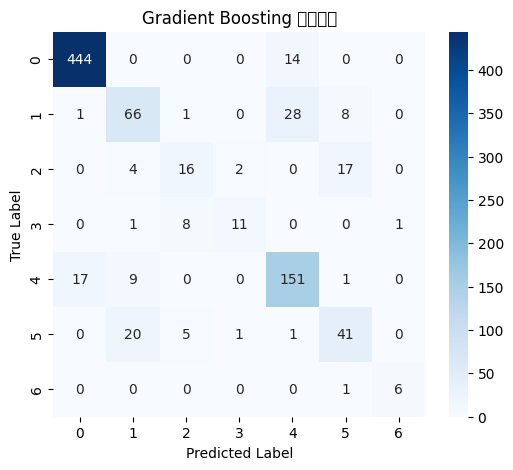

In [3]:

# **去除高度相关特征**
X = customer_features.drop(columns=["CustomerID", "CustomerCluster",
                                    "Category_0", "Category_1", "Category_2",
                                    "Category_3", "Category_4", "Category_5",
                                    "TotalSpent", "PurchaseFrequency"])  # **移除可疑特征**
y = customer_features["CustomerCluster"]

# **数据标准化**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **划分训练集 & 测试集**
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# **定义分类器**
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=25, min_samples_split=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_split=5),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=0.5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
}

# **存储模型交叉验证准确率**
results = []

# **训练模型，进行交叉验证**
for name, model in classifiers.items():
    # 交叉验证
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring="accuracy")
    avg_accuracy = np.mean(cv_scores)
    results.append({"Model": name, "Cross-Validation Accuracy": avg_accuracy})

    # 训练模型
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # **输出分类报告**
    print(f"\n{name} 测试集准确率: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    # **绘制混淆矩阵**
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} 混淆矩阵")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


<ipython-input-4-87754ff7cfc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Cross-Validation Accuracy", data=accuracy_df, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: 

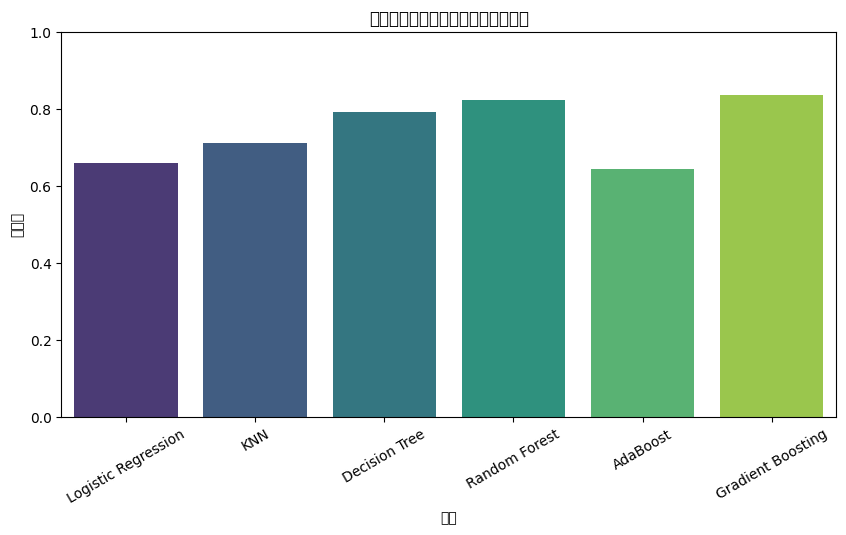


模型交叉验证准确性对比:
                  Model  Cross-Validation Accuracy
0  Logistic Regression                   0.660343
1                  KNN                   0.711572
2        Decision Tree                   0.793686
3        Random Forest                   0.823424
4             AdaBoost                   0.644560
5    Gradient Boosting                   0.835774


In [4]:

# **转换为 DataFrame 并展示结果**
accuracy_df = pd.DataFrame(results)

# **绘制准确率对比图**
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Cross-Validation Accuracy", data=accuracy_df, palette="viridis")
plt.title("不同分类模型的交叉验证准确率对比")
plt.xlabel("模型")
plt.ylabel("准确率")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()

# **输出最终准确率表格**
print("\n模型交叉验证准确性对比:\n", accuracy_df)





##投票分类器优化

###组合模型
*   基于初步的测试发现：
*   随机森林、梯度提升的性能最好
*   KNN 和逻辑回归虽然单独表现一般，但与其他模型结合时可以提供额外的决策信息
*   AdaBoost 和决策树效果较差，未被纳入最终投票分类器

###权重调整
*   通过多次测试，发现以下权重组合效果最佳：
*   随机森林（权重 2）
*   梯度提升（权重 3）
*   KNN（权重 1）
*   逻辑回归（权重 0.5）
*   最终模型准确率：0.8446











投票分类器测试集准确率: 0.8423
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       458
           1       0.67      0.63      0.65       104
           2       0.55      0.44      0.49        39
           3       0.69      0.52      0.59        21
           4       0.78      0.85      0.81       178
           5       0.65      0.60      0.63        68
           6       0.86      0.86      0.86         7

    accuracy                           0.84       875
   macro avg       0.74      0.70      0.71       875
weighted avg       0.84      0.84      0.84       875



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28102 (\N{CJK UNIFIED IDEOGRAPH-6DC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


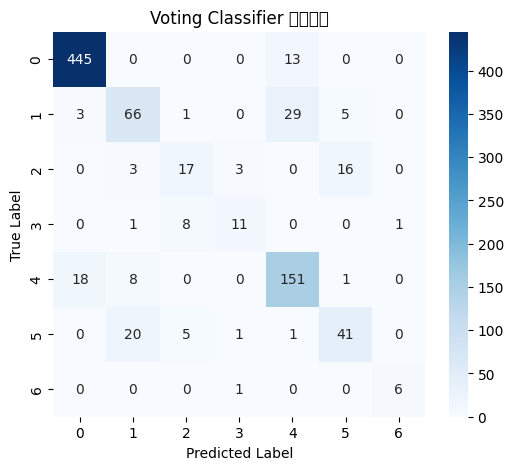

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20064 (\N{CJK UNIFIED IDEOGRAPH-4E60}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


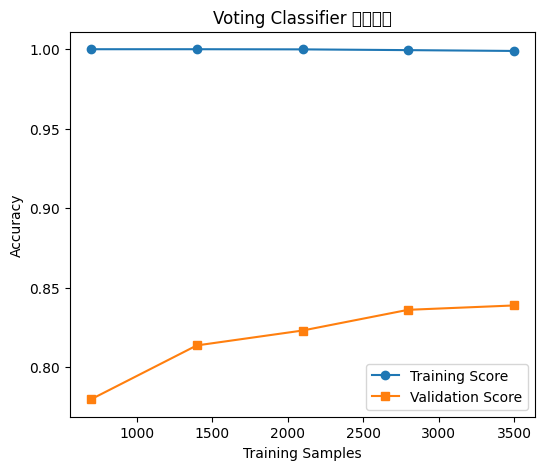

In [5]:

# **创建投票分类器（Voting Classifier）**
voting_clf = VotingClassifier(estimators=[
    ("Random Forest", classifiers["Random Forest"]),
    ("Gradient Boosting", classifiers["Gradient Boosting"]),
    ("KNN", classifiers["KNN"]),
    ("Logistic Regression", classifiers["Logistic Regression"])
], voting="soft", weights=[2, 3, 1, 0.5])

# **训练投票分类器**
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# **计算投票分类器准确率**
print(f"\n投票分类器测试集准确率: {accuracy_score(y_test, y_pred_voting):.4f}")
print(classification_report(y_test, y_pred_voting))

# **绘制投票分类器混淆矩阵**
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt="d", cmap="Blues")
plt.title("Voting Classifier 混淆矩阵")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **绘制学习曲线**
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.2, 1.0, 5))

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6, 5))
    plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
    plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
    plt.title(f"{model_name} 学习曲线")
    plt.xlabel("Training Samples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# **绘制投票分类器的学习曲线**
plot_learning_curve(voting_clf, X_scaled, y, "Voting Classifier")


投票分类器测试集准确率: 0.8434
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       458
           1       0.66      0.64      0.65       104
           2       0.58      0.46      0.51        39
           3       0.76      0.62      0.68        21
           4       0.78      0.83      0.81       178
           5       0.64      0.57      0.60        68
           6       1.00      1.00      1.00         7

    accuracy                           0.84       875
   macro avg       0.77      0.73      0.75       875
weighted avg       0.84      0.84      0.84       875



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28102 (\N{CJK UNIFIED IDEOGRAPH-6DC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


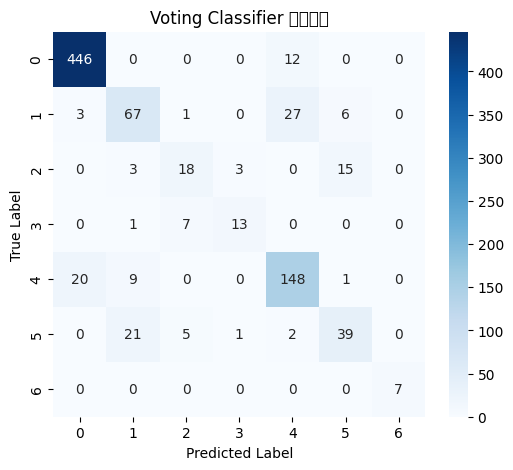

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20064 (\N{CJK UNIFIED IDEOGRAPH-4E60}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


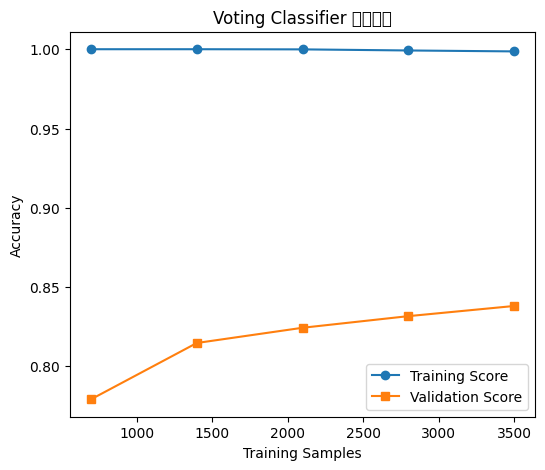

In [6]:

# **创建投票分类器（Voting Classifier）**
voting_clf = VotingClassifier(estimators=[
    ("Random Forest", classifiers["Random Forest"]),
    ("Gradient Boosting", classifiers["Gradient Boosting"]),
    ("KNN", classifiers["KNN"]),
    ("Logistic Regression", classifiers["Logistic Regression"])
], voting="soft", weights=[3, 3, 1, 1])

# **训练投票分类器**
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# **计算投票分类器准确率**
print(f"\n投票分类器测试集准确率: {accuracy_score(y_test, y_pred_voting):.4f}")
print(classification_report(y_test, y_pred_voting))

# **绘制投票分类器混淆矩阵**
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt="d", cmap="Blues")
plt.title("Voting Classifier 混淆矩阵")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **绘制学习曲线**
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.2, 1.0, 5))

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6, 5))
    plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
    plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
    plt.title(f"{model_name} 学习曲线")
    plt.xlabel("Training Samples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# **绘制投票分类器的学习曲线**
plot_learning_curve(voting_clf, X_scaled, y, "Voting Classifier")


投票分类器测试集准确率: 0.8423
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       458
           1       0.70      0.66      0.68       104
           2       0.53      0.44      0.48        39
           3       0.71      0.57      0.63        21
           4       0.79      0.83      0.81       178
           5       0.65      0.59      0.62        68
           6       1.00      0.86      0.92         7

    accuracy                           0.84       875
   macro avg       0.76      0.70      0.73       875
weighted avg       0.84      0.84      0.84       875



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28102 (\N{CJK UNIFIED IDEOGRAPH-6DC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


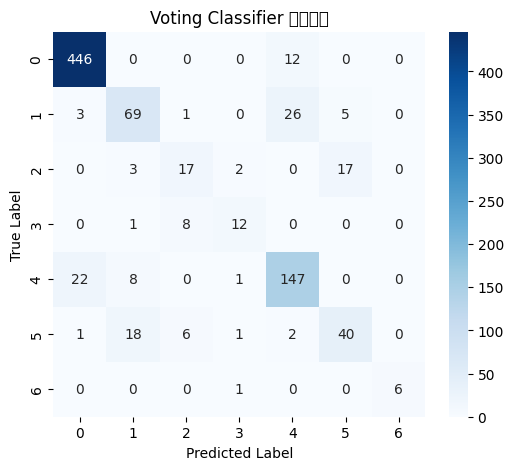

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20064 (\N{CJK UNIFIED IDEOGRAPH-4E60}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


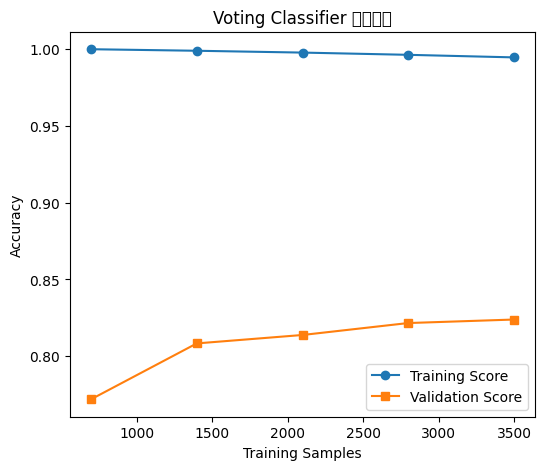

In [7]:

# **创建投票分类器（Voting Classifier）**
voting_clf = VotingClassifier(estimators=[
    ("Random Forest", classifiers["Random Forest"]),
    ("Gradient Boosting", classifiers["Gradient Boosting"]),
    ("KNN", classifiers["KNN"]),
    ("Logistic Regression", classifiers["Logistic Regression"])
], voting="soft", weights=[2, 2, 2, 1])

# **训练投票分类器**
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# **计算投票分类器准确率**
print(f"\n投票分类器测试集准确率: {accuracy_score(y_test, y_pred_voting):.4f}")
print(classification_report(y_test, y_pred_voting))

# **绘制投票分类器混淆矩阵**
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt="d", cmap="Blues")
plt.title("Voting Classifier 混淆矩阵")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **绘制学习曲线**
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.2, 1.0, 5))

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6, 5))
    plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
    plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
    plt.title(f"{model_name} 学习曲线")
    plt.xlabel("Training Samples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# **绘制投票分类器的学习曲线**
plot_learning_curve(voting_clf, X_scaled, y, "Voting Classifier")